In [65]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.mixture import BayesianGaussianMixture
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

In [3]:
print(x.shape, y.shape)

(70000, 784) (70000,)


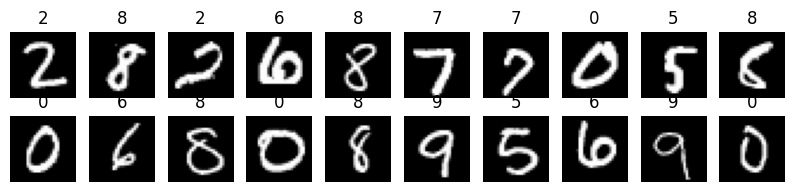

In [4]:
indices = np.random.randint(0, 70000, 20)

plt.figure(figsize=(10,2))
for i, idx in enumerate(indices):
    plt.subplot(2,10,i+1)
    plt.imshow(x[idx].reshape(28,28), cmap="gray")
    plt.title(y[idx])
    plt.axis("off")
plt.show()

In [5]:
np.isnan(x).sum()

np.int64(0)

In [6]:
y.shape[0] - y.shape[0]*.15, y.shape[0]*.15

(59500.0, 10500.0)

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size= .15, random_state = 42)

In [8]:
ytrain.shape

(59500,)

In [38]:
pca = PCA()
pca.fit(xtrain)
objasnjenaVar1 = pca.explained_variance_ratio_
print(np.argmax(np.cumsum(objasnjenaVar1) >= .95))
### PRVIH 153 GLANIH KOMPONENTI OBJASNJAVA 95% VARIJACIJE
pca = PCA(n_components= np.argmax(np.cumsum(objasnjenaVar1) >= .95))
xtrainpca = pca.fit_transform(xtrain)
xtrainInvers = pca.inverse_transform(xtrainpca)

153


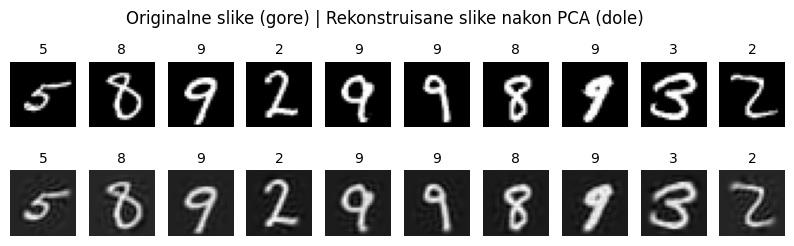

In [39]:
indices = np.random.randint(0, xtrain.shape[0], 10)

plt.figure(figsize=(10, 4))

for i, idx in enumerate(indices):
    # Originalna slika
    plt.subplot(3, 10, i + 1)
    plt.imshow(xtrain[idx].reshape(28, 28), cmap="gray")
    plt.axis("off")
    plt.title(ytrain[idx], fontsize=10)

    # Rekonstruisana slika nakon PCA inverzne transformacije
    plt.subplot(3, 10, i + 11)
    plt.imshow(xtrainInvers1[idx].reshape(28, 28), cmap="gray")
    plt.axis("off")
    plt.title(ytrain[idx], fontsize=10)

plt.suptitle("Originalne slike (gore) | Rekonstruisane slike nakon PCA (dole)", fontsize=12)
plt.show()

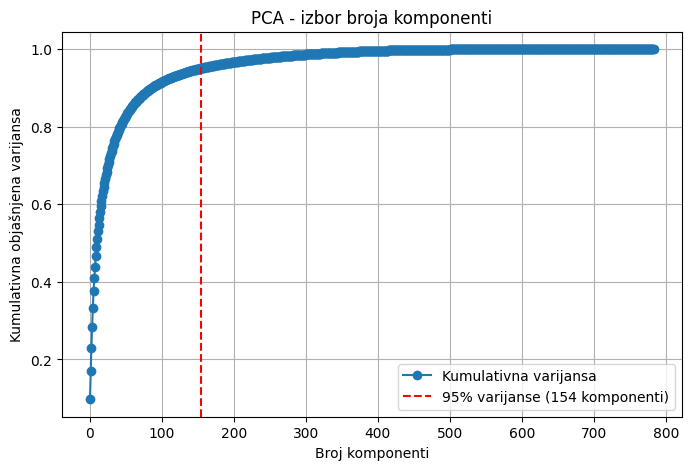

In [40]:
optimalanBrojKomponenti = np.argmax(np.cumsum(objasnjenaVar1) >= 0.95) + 1 
# Vizualizacija varijanse po komponentama
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(objasnjenaVar1), marker='o', linestyle='-', label="Kumulativna varijansa")

# Obeležava tačku gde dostižemo 95% varijanse
plt.axvline(optimalanBrojKomponenti, color='r', linestyle='--', 
            label=f'95% varijanse ({optimalanBrojKomponenti} komponenti)')

plt.xlabel("Broj komponenti")
plt.ylabel("Kumulativna objašnjena varijansa")
plt.legend()
plt.title("PCA - izbor broja komponenti")
plt.grid()
plt.show()

In [41]:
xtestpca = pca.fit_transform(xtest)
print(xtestpca.shape)

(10500, 153)


In [45]:
xtrainpca.max(), xtestpca.max()

(np.float64(2386.980677414902), np.float64(2343.79439279806))

In [35]:
np.logspace(0,1.3,7)

array([ 1.        ,  1.64689787,  2.71227258,  4.46683592,  7.35642254,
       12.11527659, 19.95262315])

In [44]:
MinMaxScaler().fit_transform(xtrainpca)

array([[0.55999556, 0.5248785 , 0.73815525, ..., 0.40356384, 0.52153357,
        0.4523982 ],
       [0.67083921, 0.51990097, 0.46832414, ..., 0.45778216, 0.53809166,
        0.46132181],
       [0.2224681 , 0.64925205, 0.58975639, ..., 0.46865329, 0.55376855,
        0.51940976],
       ...,
       [0.02900059, 0.63481139, 0.50273872, ..., 0.45152992, 0.51784829,
        0.51464236],
       [0.66525957, 0.64861944, 0.24503213, ..., 0.52299964, 0.53319802,
        0.47358597],
       [0.54188008, 0.87507086, 0.23207762, ..., 0.50464958, 0.40069236,
        0.39900861]], shape=(59500, 153))

In [46]:
prep = Pipeline([('pca', PCA(n_components=153)),('scaler', MinMaxScaler())])

In [49]:
xtrain = prep.fit_transform(xtrain)

In [50]:
xtrain.max()

np.float64(1.0000000000000002)

In [51]:
Pipeline([('prep', prep), ('model', LogisticRegression())])

Pipeline(steps=[('prep',
                 Pipeline(steps=[('pca', PCA(n_components=153)),
                                 ('scaler', MinMaxScaler())])),
                ('model', LogisticRegression())])

In [67]:
logitPipe = Pipeline([('prep', prep), ('model', LogisticRegression(solver='saga',random_state=42))])
logitGrid = {'model__C': np.logspace(0,1.5,10), 'model__penalty': ['l2'], 'model__max_iter': [100, 300, 500]}
logit = RandomizedSearchCV(logitPipe, logitGrid, n_iter=15, cv=3, scoring='accuracy', n_jobs=-1, verbose=3)
logit.fit(xtrainpca, ytrain)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


KeyboardInterrupt: 

In [ ]:
np.argmax(rezLogitTrain), np.argmax(rezLogitTest)

In [ ]:
(np.array(rezLogitTest) -.9) *1000

In [ ]:
rezLogitTest[5] == rezLogitTest[-1]

In [ ]:
regulacija[5], regulacija[-1]

In [ ]:
regulacija[np.argmax(rezLogit)]

In [ ]:
pipeLogit.score(xtrainpca, ytrain)

In [176]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml

In [177]:
data = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)


In [178]:
data = np.hstack((data[1].reshape(-1,1),data[0]))
data.shape

(70000, 785)

In [141]:
data[:10000].T

array([['5', '0', '4', ..., '6', '9', '7'],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(785, 10000), dtype=object)

In [187]:
np.random.seed(42)
np.random.shuffle(data)
datadev = data[:10000]
datatest = data[10000:20000]
datatrain = data[20000:]
xdev, ydev = datadev[:,1:] / 255, datadev[:,0]
xtest, ytest = datatest[:,1:] / 255, datatest[:,0]
xtrain, ytrain = datatrain[:,1:] / 255, datatrain[:,0]

In [188]:
xtrain.shape, ytrain.shape

((50000, 784), (50000,))

In [198]:
xtrain[0].shape, xtrain.max()

((784,), 1.0)

In [227]:
n, m = x.shape
n

784

In [241]:
np.random.seed(42)
w1 = np.random.random((n ,10)) - 0.5
b1 = np.random.random((10)) - 0.5
w2 = np.random.random((10,10)) - 0.5
b2 = np.random.random((1,10)) - 0.5
print(w1.mean(), b1.mean(), w2.mean(), b1.mean())

-0.004640880154318337 -0.056669043168148844 -0.040007102392174525 -0.056669043168148844


In [236]:
w1.shape, xtrain.shape

((784, 10), (50000, 784))

In [243]:
z1 = xtrain @ w1 + b1
z1[0]

array([-3.719964537757306, 0.1548169621908458, 2.7988197480057058,
       -0.28689321782729044, 0.08065409865687698, 2.008742078104681,
       -3.155859128847374, -1.7379957830562731, 3.155981943761763,
       -2.3528630037570024], dtype=object)

In [242]:
b1

array([ 0.06831915, -0.06049222, -0.43275937, -0.03531053,  0.32073584,
        0.11454102,  0.33216245, -0.00598833, -0.38153829, -0.48636015])

In [239]:
h1 = np.maximum(z1,0)

In [167]:
h1.shape, w2.shape

((10, 50000), (10, 10))

In [175]:
h1[0]

array([0, 1.1654117381822091, 0.6326911151428865, ..., 0, 0,
       0.05353148606517], shape=(50000,), dtype=object)

In [173]:
z2 = w2 @ h1
z2

array([[0.6448104964659652, -0.8071466569173449, -0.38822693647140083,
        ..., -1.1345217819043596, -0.05562422477498545,
        -0.1648595269917829],
       [-4.2018781538761925, -1.4583628947441076, -0.9872819918643886,
        ..., -0.43738119975771905, -0.4154114295802779,
        0.22941813250863158],
       [-0.7076006295832468, -0.12769701674487516, 1.6447510520759432,
        ..., 1.8724691094530002, -0.0005371210291886669,
        -1.062750492359547],
       ...,
       [1.1850077503725518, -0.08573677298131507, -1.2522246620428847,
        ..., 0.21529331662293405, 0.05897715194259112,
        -0.03378486511308165],
       [0.9760170433511741, 0.3787107835330019, 0.06947551290185557, ...,
        -1.4046979059242104, 0.13323522889068523, -0.9764448403368676],
       [0.7444873200409297, -1.0558074215965303, -0.6313095747544657,
        ..., -1.5156019947080166, -0.09588038712610356,
        -1.795543088596077]], shape=(10, 50000), dtype=object)

In [133]:
w1.shape, xtrain.shape

((10, 784), (784, 50000))

In [108]:
np.random.random((10,n))

array([[0.66242341, 0.09782956, 0.69778271, ..., 0.15003637, 0.63358555,
        0.32425139],
       [0.85901448, 0.34357763, 0.28683389, ..., 0.65772056, 0.16862584,
        0.01993354],
       [0.9311361 , 0.9352847 , 0.78797078, ..., 0.31851961, 0.27238157,
        0.30875803],
       ...,
       [0.02137968, 0.20377866, 0.24240391, ..., 0.90724231, 0.68378175,
        0.03253458],
       [0.22535556, 0.97910062, 0.90595037, ..., 0.93652082, 0.60356485,
        0.73135732],
       [0.22951675, 0.09475797, 0.08318493, ..., 0.60841339, 0.72502394,
        0.6359934 ]], shape=(10, 784))

TypeError: 'tuple' object does not support item assignment